# M-Estimators for Robust Linear Modeling

In [1]:
%matplotlib inline

In [2]:
from statsmodels.compat import lmap
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm

* An M-estimator minimizes the function 

$$Q(e_i, \rho) = \sum_i~\rho \left (\frac{e_i}{s}\right )$$

where $\rho$ is a symmetric function of the residuals 

* The effect of $\rho$ is to reduce the influence of outliers
* $s$ is an estimate of scale. 
* The robust estimates $\hat{\beta}$ are computed by the iteratively re-weighted least squares algorithm

* We have several choices available for the weighting functions to be used

In [3]:
norms = sm.robust.norms

In [4]:
def plot_weights(support, weights_func, xlabels, xticks):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.plot(support, weights_func(support))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=16)
    ax.set_ylim(-0.1, 1.1)
    return ax

### Andrew's Wave

In [5]:
help(norms.AndrewWave.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Andrew's wave weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = sin(z/a)/(z/a)     for \|z\| <= a*pi
    
        weights(z) = 0                  for \|z\| > a*pi



<AxesSubplot:>

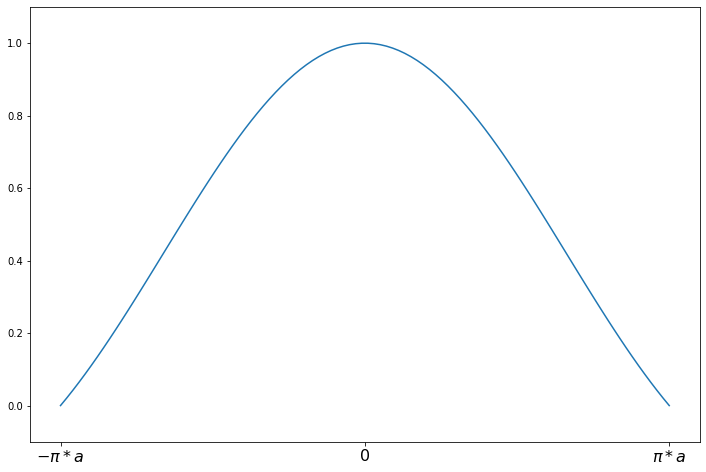

In [6]:
a = 1.339
support = np.linspace(-np.pi * a, np.pi * a, 100)
andrew = norms.AndrewWave(a=a)
plot_weights(
    support, andrew.weights, ["$-\pi*a$", "0", "$\pi*a$"], [-np.pi * a, 0, np.pi * a]
)

### Hampel's 17A

In [7]:
help(norms.Hampel.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Hampel weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = 1                            for \|z\| <= a
    
        weights(z) = a/\|z\|                        for a < \|z\| <= b
    
        weights(z) = a*(c - \|z\|)/(\|z\|*(c-b))      for b < \|z\| <= c
    
        weights(z) = 0                            for \|z\| > c



<AxesSubplot:>

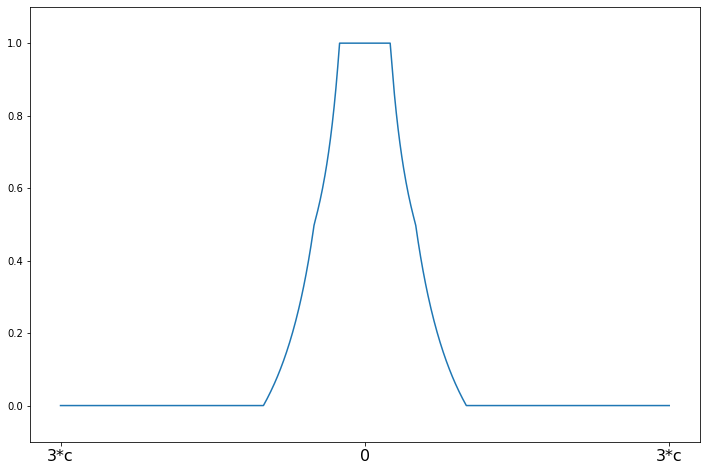

In [8]:
c = 8
support = np.linspace(-3 * c, 3 * c, 1000)
hampel = norms.Hampel(a=2.0, b=4.0, c=c)
plot_weights(support, hampel.weights, ["3*c", "0", "3*c"], [-3 * c, 0, 3 * c])

### Huber's t

In [9]:
help(norms.HuberT.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Huber's t weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = 1          for \|z\| <= t
    
        weights(z) = t/\|z\|      for \|z\| > t



<AxesSubplot:>

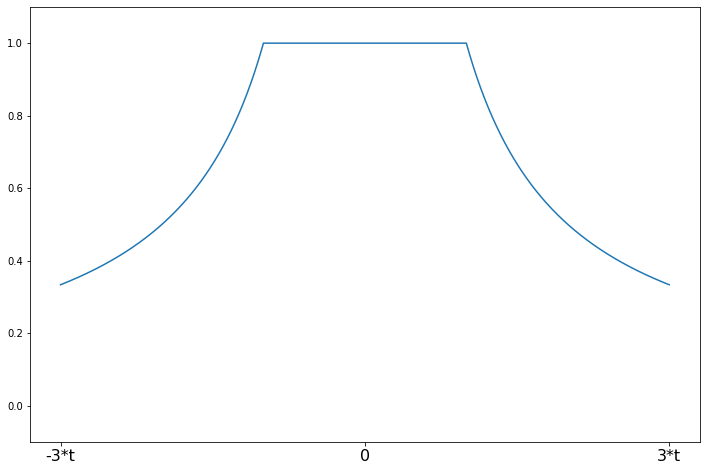

In [10]:
t = 1.345
support = np.linspace(-3 * t, 3 * t, 1000)
huber = norms.HuberT(t=t)
plot_weights(support, huber.weights, ["-3*t", "0", "3*t"], [-3 * t, 0, 3 * t])

### Least Squares

In [11]:
help(norms.LeastSquares.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    The least squares estimator weighting function for the IRLS algorithm.
    
    The psi function scaled by the input z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = np.ones(z.shape)



<AxesSubplot:>

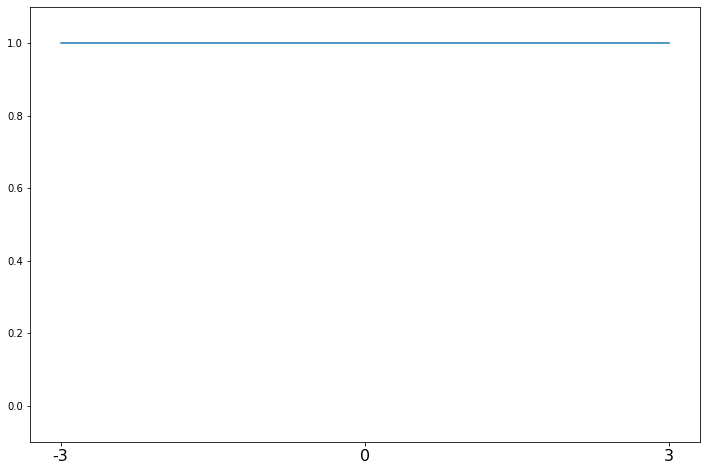

In [12]:
support = np.linspace(-3, 3, 1000)
lst_sq = norms.LeastSquares()
plot_weights(support, lst_sq.weights, ["-3", "0", "3"], [-3, 0, 3])

### Ramsay's Ea

In [13]:
help(norms.RamsayE.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Ramsay's Ea weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = exp(-a*\|z\|)



<AxesSubplot:>

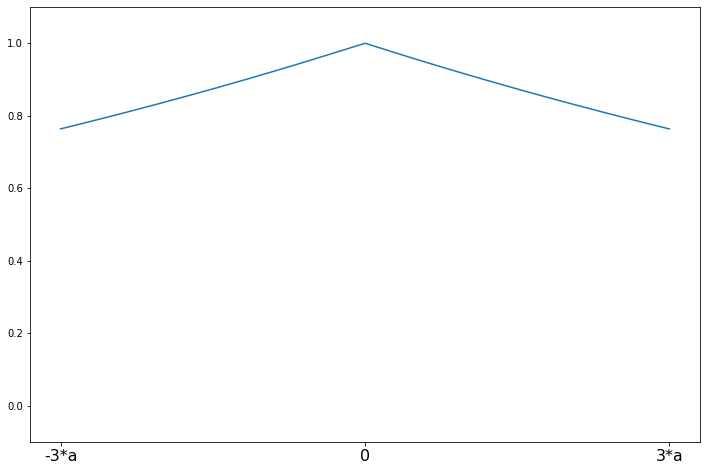

In [14]:
a = 0.3
support = np.linspace(-3 * a, 3 * a, 1000)
ramsay = norms.RamsayE(a=a)
plot_weights(support, ramsay.weights, ["-3*a", "0", "3*a"], [-3 * a, 0, 3 * a])

### Trimmed Mean

In [15]:
help(norms.TrimmedMean.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Least trimmed mean weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = 1             for \|z\| <= c
    
        weights(z) = 0             for \|z\| > c



<AxesSubplot:>

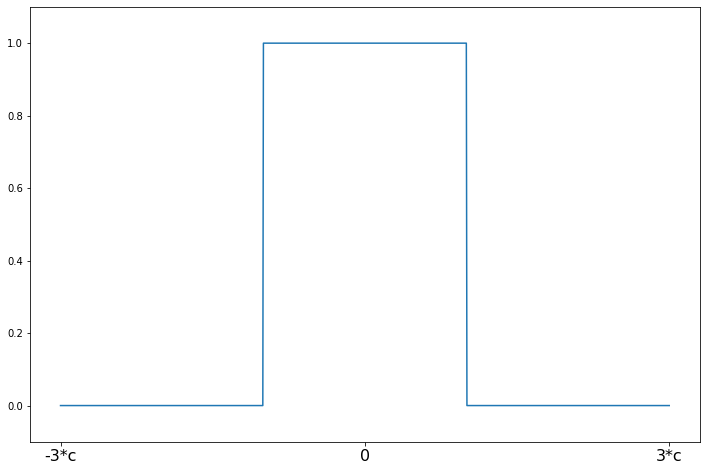

In [16]:
c = 2
support = np.linspace(-3 * c, 3 * c, 1000)
trimmed = norms.TrimmedMean(c=c)
plot_weights(support, trimmed.weights, ["-3*c", "0", "3*c"], [-3 * c, 0, 3 * c])

### Tukey's Biweight

In [17]:
help(norms.TukeyBiweight.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Tukey's biweight weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        psi(z) = (1 - (z/c)**2)**2          for \|z\| <= R
    
        psi(z) = 0                          for \|z\| > R



<AxesSubplot:>

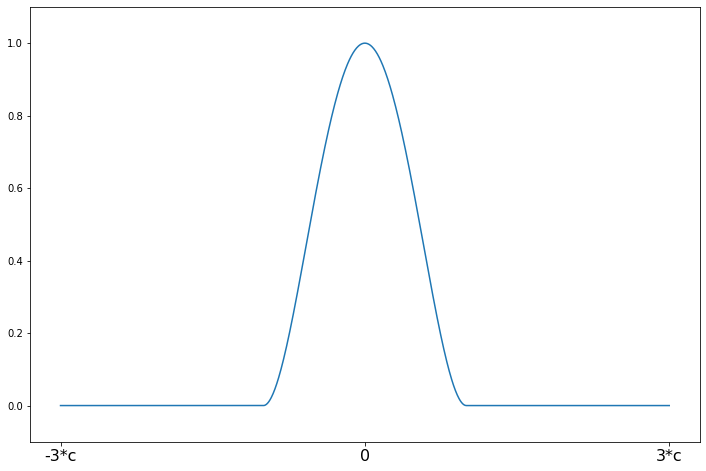

In [18]:
c = 4.685
support = np.linspace(-3 * c, 3 * c, 1000)
tukey = norms.TukeyBiweight(c=c)
plot_weights(support, tukey.weights, ["-3*c", "0", "3*c"], [-3 * c, 0, 3 * c])

### Scale Estimators

* Robust estimates of the location

In [19]:
x = np.array([1, 2, 3, 4, 500])

* The mean is not a robust estimator of location

In [20]:
x.mean()

102.0

* The median, on the other hand, is a robust estimator with a breakdown point of 50%

In [21]:
np.median(x)

3.0

* Analogously for the scale
* The standard deviation is not robust

In [22]:
x.std()

199.00251254695254

Median Absolute Deviation

$$ median_i |X_i - median_j(X_j)|) $$

Standardized Median Absolute Deviation is a consistent estimator for $\hat{\sigma}$

$$\hat{\sigma}=K \cdot MAD$$

where $K$ depends on the distribution. For the normal distribution for example,

$$K = \Phi^{-1}(.75)$$

In [23]:
stats.norm.ppf(0.75)

0.6744897501960817

In [24]:
print(x)

[  1   2   3   4 500]


In [25]:
sm.robust.scale.mad(x)

1.482602218505602

In [26]:
np.array([1, 2, 3, 4, 5.0]).std()

1.4142135623730951

Another robust estimator of scale is the Interquartile Range (IQR)

$$\left(\hat{X}_{0.75} - \hat{X}_{0.25}\right),$$

where $\hat{X}_{p}$ is the sample p-th quantile and $K$ depends on the distribution. 

The standardized IQR, given by $K \cdot \text{IQR}$ for
$$K = \frac{1}{\Phi^{-1}(.75) - \Phi^{-1}(.25)} \approx 0.74,$$
is a consistent estimator of the standard deviation for normal data.

In [27]:
sm.robust.scale.iqr(x)

array(1.48260222)

The IQR is less robust than the MAD in the sense that it has a lower breakdown point: it can withstand 25\% outlying observations before being completely ruined, whereas the MAD can withstand 50\% outlying observations. However, the IQR is better suited for asymmetric distributions.

Yet another robust estimator of scale is the $Q_n$ estimator, introduced in Rousseeuw & Croux (1993), 'Alternatives to the Median Absolute Deviation'. Then $Q_n$ estimator is given by
$$
Q_n = K \left\lbrace \vert X_{i} - X_{j}\vert : i<j\right\rbrace_{(h)}
$$
where $h\approx (1/4){{n}\choose{2}}$ and $K$ is a given constant. In words, the $Q_n$ estimator is the normalized $h$-th order statistic of the absolute differences of the data. The normalizing constant $K$ is usually chosen as 2.219144, to make the estimator consistent for the standard deviation in the case of normal data. The $Q_n$ estimator has a 50\% breakdown point and a 82\% asymptotic efficiency at the normal distribution, much higher than the 37\% efficiency of the MAD.

In [28]:
sm.robust.scale.qn_scale(x)

2.219144465985076

* The default for Robust Linear Models is MAD
* another popular choice is Huber's proposal 2

In [29]:
np.random.seed(12345)
fat_tails = stats.t(6).rvs(40)

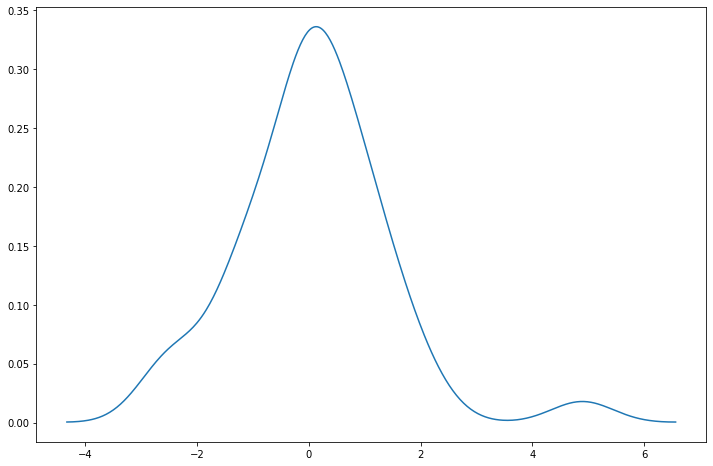

In [30]:
kde = sm.nonparametric.KDEUnivariate(fat_tails)
kde.fit()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(kde.support, kde.density)

In [31]:
print(fat_tails.mean(), fat_tails.std())

0.0688231044810875 1.3471633229698652


In [32]:
print(stats.norm.fit(fat_tails))

(0.0688231044810875, 1.3471633229698652)


In [33]:
print(stats.t.fit(fat_tails, f0=6))

(6, 0.03900835312789366, 1.0563837144431252)


In [34]:
huber = sm.robust.scale.Huber()
loc, scale = huber(fat_tails)
print(loc, scale)

0.04048984333271795 1.1557140047569665


In [35]:
sm.robust.mad(fat_tails)

1.115335001165415

In [36]:
sm.robust.mad(fat_tails, c=stats.t(6).ppf(0.75))

1.0483916565928972

In [37]:
sm.robust.scale.mad(fat_tails)

1.115335001165415

### Duncan's Occupational Prestige data - M-estimation for outliers

In [38]:
from statsmodels.graphics.api import abline_plot
from statsmodels.formula.api import ols, rlm

In [39]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

In [40]:
print(prestige.head(10))

            type  income  education  prestige
accountant  prof      62         86        82
pilot       prof      72         76        83
architect   prof      75         92        90
author      prof      55         90        76
chemist     prof      64         86        90
minister    prof      21         84        87
professor   prof      64         93        93
dentist     prof      80        100        90
reporter      wc      67         87        52
engineer    prof      72         86        88


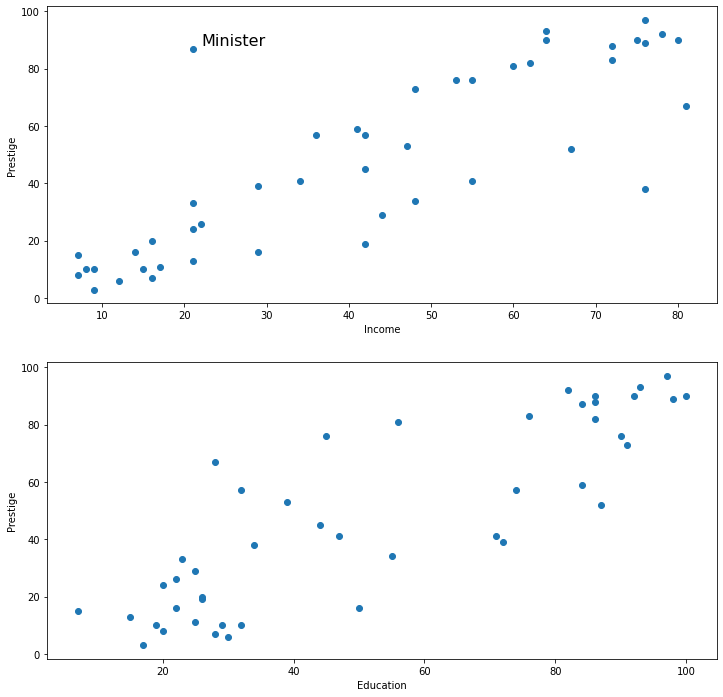

In [41]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(211, xlabel="Income", ylabel="Prestige")
ax1.scatter(prestige.income, prestige.prestige)
xy_outlier = prestige.loc["minister", ["income", "prestige"]]
ax1.annotate("Minister", xy_outlier, xy_outlier + 1, fontsize=16)
ax2 = fig.add_subplot(212, xlabel="Education", ylabel="Prestige")
ax2.scatter(prestige.education, prestige.prestige)

In [42]:
ols_model = ols("prestige ~ income + education", prestige).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           8.65e-17
Time:                        23:35:57   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

In [43]:
infl = ols_model.get_influence()
student = infl.summary_frame()["student_resid"]
print(student)

accountant            0.303900
pilot                 0.340920
architect             0.072256
author                0.000711
chemist               0.826578
minister              3.134519
professor             0.768277
dentist              -0.498082
reporter             -2.397022
engineer              0.306225
undertaker           -0.187339
lawyer               -0.303082
physician             0.355687
welfare.worker       -0.411406
teacher               0.050510
conductor            -1.704032
contractor            2.043805
factory.owner         1.602429
store.manager         0.142425
banker                0.508388
bookkeeper           -0.902388
mail.carrier         -1.433249
insurance.agent      -1.930919
store.clerk          -1.760491
carpenter             1.068858
electrician           0.731949
RR.engineer           0.808922
machinist             1.887047
auto.repairman        0.522735
plumber              -0.377954
gas.stn.attendant    -0.666596
coal.miner            1.018527
streetca

In [44]:
print(student.loc[np.abs(student) > 2])

minister      3.134519
reporter     -2.397022
contractor    2.043805
Name: student_resid, dtype: float64


In [45]:
print(infl.summary_frame().loc["minister"])

dfb_Intercept      0.144937
dfb_income        -1.220939
dfb_education      1.263019
cooks_d            0.566380
standard_resid     2.849416
hat_diag           0.173058
dffits_internal    1.303510
student_resid      3.134519
dffits             1.433935
Name: minister, dtype: float64


In [46]:
sidak = ols_model.outlier_test("sidak")
sidak.sort_values("unadj_p", inplace=True)
print(sidak)

                    student_resid   unadj_p  sidak(p)
minister                 3.134519  0.003177  0.133421
reporter                -2.397022  0.021170  0.618213
contractor               2.043805  0.047433  0.887721
insurance.agent         -1.930919  0.060428  0.939485
machinist                1.887047  0.066248  0.954247
store.clerk             -1.760491  0.085783  0.982331
conductor               -1.704032  0.095944  0.989315
factory.owner            1.602429  0.116738  0.996250
mail.carrier            -1.433249  0.159369  0.999595
streetcar.motorman      -1.104485  0.275823  1.000000
carpenter                1.068858  0.291386  1.000000
coal.miner               1.018527  0.314400  1.000000
bartender               -0.902422  0.372104  1.000000
bookkeeper              -0.902388  0.372122  1.000000
soda.clerk              -0.883095  0.382334  1.000000
chemist                  0.826578  0.413261  1.000000
RR.engineer              0.808922  0.423229  1.000000
professor                0.7

In [47]:
fdr = ols_model.outlier_test("fdr_bh")
fdr.sort_values("unadj_p", inplace=True)
print(fdr)

                    student_resid   unadj_p  fdr_bh(p)
minister                 3.134519  0.003177   0.142974
reporter                -2.397022  0.021170   0.476332
contractor               2.043805  0.047433   0.596233
insurance.agent         -1.930919  0.060428   0.596233
machinist                1.887047  0.066248   0.596233
store.clerk             -1.760491  0.085783   0.616782
conductor               -1.704032  0.095944   0.616782
factory.owner            1.602429  0.116738   0.656653
mail.carrier            -1.433249  0.159369   0.796844
streetcar.motorman      -1.104485  0.275823   0.999436
carpenter                1.068858  0.291386   0.999436
coal.miner               1.018527  0.314400   0.999436
bartender               -0.902422  0.372104   0.999436
bookkeeper              -0.902388  0.372122   0.999436
soda.clerk              -0.883095  0.382334   0.999436
chemist                  0.826578  0.413261   0.999436
RR.engineer              0.808922  0.423229   0.999436
professor 

In [48]:
rlm_model = rlm("prestige ~ income + education", prestige).fit()
print(rlm_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               prestige   No. Observations:                   45
Model:                            RLM   Df Residuals:                       42
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 12 Nov 2021                                         
Time:                        23:35:57                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1107      3.879     -1.833      0.0

In [49]:
print(rlm_model.weights)

accountant            1.000000
pilot                 1.000000
architect             1.000000
author                1.000000
chemist               1.000000
minister              0.344596
professor             1.000000
dentist               1.000000
reporter              0.441669
engineer              1.000000
undertaker            1.000000
lawyer                1.000000
physician             1.000000
welfare.worker        1.000000
teacher               1.000000
conductor             0.538445
contractor            0.552262
factory.owner         0.706169
store.manager         1.000000
banker                1.000000
bookkeeper            1.000000
mail.carrier          0.690764
insurance.agent       0.533499
store.clerk           0.618656
carpenter             0.935848
electrician           1.000000
RR.engineer           1.000000
machinist             0.570360
auto.repairman        1.000000
plumber               1.000000
gas.stn.attendant     1.000000
coal.miner            0.963821
streetca

### Hertzprung Russell data for Star Cluster CYG 0B1 - Leverage Points

* Data is on the luminosity and temperature of 47 stars in the direction of Cygnus.

In [50]:
dta = sm.datasets.get_rdataset("starsCYG", "robustbase", cache=True).data

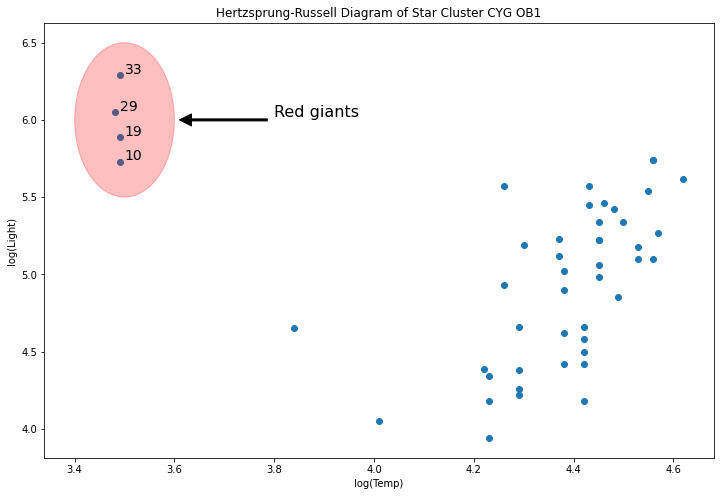

In [51]:
from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(
    111,
    xlabel="log(Temp)",
    ylabel="log(Light)",
    title="Hertzsprung-Russell Diagram of Star Cluster CYG OB1",
)
ax.scatter(*dta.values.T)
# highlight outliers
e = Ellipse((3.5, 6), 0.2, 1, alpha=0.25, color="r")
ax.add_patch(e)
ax.annotate(
    "Red giants",
    xy=(3.6, 6),
    xytext=(3.8, 6),
    arrowprops=dict(facecolor="black", shrink=0.05, width=2),
    horizontalalignment="left",
    verticalalignment="bottom",
    clip_on=True,  # clip to the axes bounding box
    fontsize=16,
)
# annotate these with their index
for i, row in dta.loc[dta["log.Te"] < 3.8].iterrows():
    ax.annotate(i, row, row + 0.01, fontsize=14)
xlim, ylim = ax.get_xlim(), ax.get_ylim()

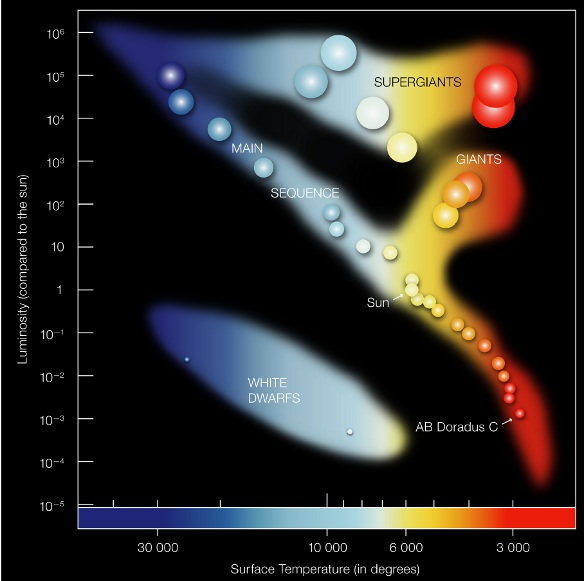

In [52]:
from IPython.display import Image

Image(filename="star_diagram.png")

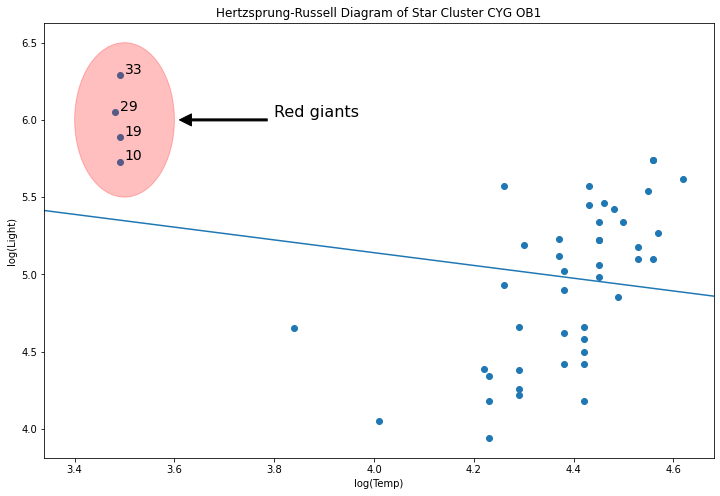

In [53]:
y = dta["log.light"]
X = sm.add_constant(dta["log.Te"], prepend=True)
ols_model = sm.OLS(y, X).fit()
abline_plot(model_results=ols_model, ax=ax)

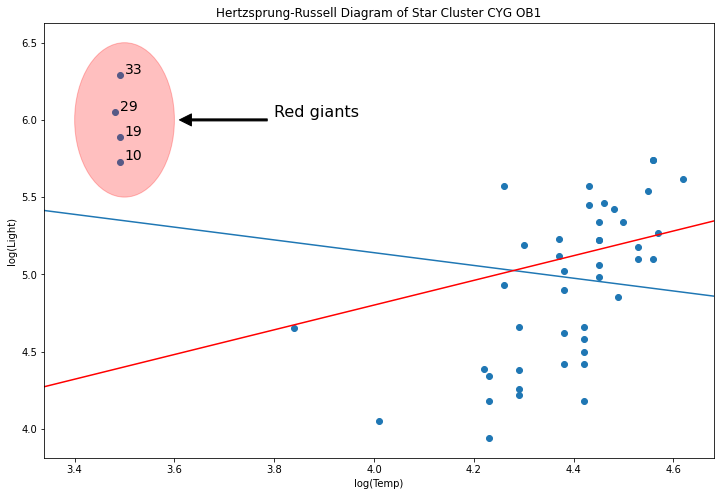

In [54]:
rlm_mod = sm.RLM(y, X, sm.robust.norms.TrimmedMean(0.5)).fit()
abline_plot(model_results=rlm_mod, ax=ax, color="red")

* Why? Because M-estimators are not robust to leverage points.

In [55]:
infl = ols_model.get_influence()

In [56]:
h_bar = 2 * (ols_model.df_model + 1) / ols_model.nobs
hat_diag = infl.summary_frame()["hat_diag"]
hat_diag.loc[hat_diag > h_bar]

10    0.194103
19    0.194103
29    0.198344
33    0.194103
Name: hat_diag, dtype: float64

In [57]:
sidak2 = ols_model.outlier_test("sidak")
sidak2.sort_values("unadj_p", inplace=True)
print(sidak2)

    student_resid   unadj_p  sidak(p)
16      -2.049393  0.046415  0.892872
13      -2.035329  0.047868  0.900286
33       1.905847  0.063216  0.953543
18      -1.575505  0.122304  0.997826
1        1.522185  0.135118  0.998911
3        1.522185  0.135118  0.998911
21      -1.450418  0.154034  0.999615
17      -1.426675  0.160731  0.999735
29       1.388520  0.171969  0.999859
14      -1.374733  0.176175  0.999889
35       1.346543  0.185023  0.999933
34      -1.272159  0.209999  0.999985
28      -1.186946  0.241618  0.999998
20      -1.150621  0.256103  0.999999
44       1.134779  0.262612  0.999999
39       1.091886  0.280826  1.000000
19       1.064878  0.292740  1.000000
6       -1.026873  0.310093  1.000000
30      -1.009096  0.318446  1.000000
22      -0.979768  0.332557  1.000000
8        0.961218  0.341695  1.000000
5        0.913802  0.365801  1.000000
11       0.871997  0.387943  1.000000
12       0.856685  0.396261  1.000000
46      -0.833923  0.408829  1.000000
10       0.7

In [58]:
fdr2 = ols_model.outlier_test("fdr_bh")
fdr2.sort_values("unadj_p", inplace=True)
print(fdr2)

    student_resid   unadj_p  fdr_bh(p)
16      -2.049393  0.046415   0.764747
13      -2.035329  0.047868   0.764747
33       1.905847  0.063216   0.764747
18      -1.575505  0.122304   0.764747
1        1.522185  0.135118   0.764747
3        1.522185  0.135118   0.764747
21      -1.450418  0.154034   0.764747
17      -1.426675  0.160731   0.764747
29       1.388520  0.171969   0.764747
14      -1.374733  0.176175   0.764747
35       1.346543  0.185023   0.764747
34      -1.272159  0.209999   0.764747
28      -1.186946  0.241618   0.764747
20      -1.150621  0.256103   0.764747
44       1.134779  0.262612   0.764747
39       1.091886  0.280826   0.764747
19       1.064878  0.292740   0.764747
6       -1.026873  0.310093   0.764747
30      -1.009096  0.318446   0.764747
22      -0.979768  0.332557   0.764747
8        0.961218  0.341695   0.764747
5        0.913802  0.365801   0.768599
11       0.871997  0.387943   0.768599
12       0.856685  0.396261   0.768599
46      -0.833923  0.4088

* Let's delete that line

In [59]:
l = ax.lines[-1]
l.remove()
del l

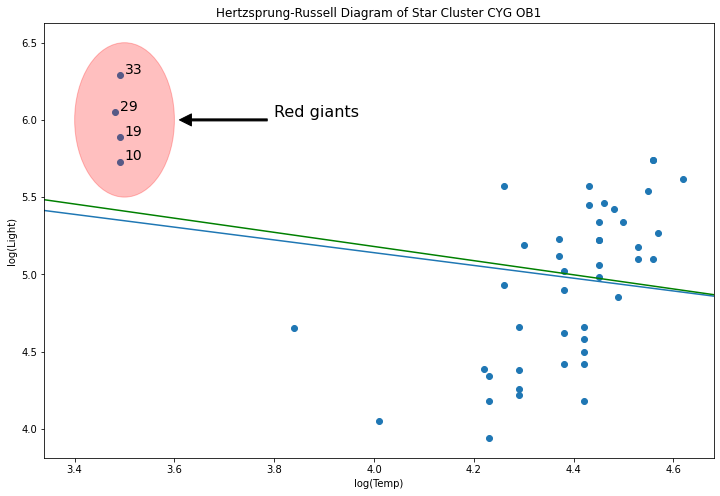

In [60]:
weights = np.ones(len(X))
weights[X[X["log.Te"] < 3.8].index.values - 1] = 0
wls_model = sm.WLS(y, X, weights=weights).fit()
abline_plot(model_results=wls_model, ax=ax, color="green")

* MM estimators are good for this type of problem, unfortunately, we do not yet have these yet. 
* It's being worked on, but it gives a good excuse to look at the R cell magics in the notebook.

In [61]:
yy = y.values[:, None]
xx = X["log.Te"].values[:, None]

**Note**: The R code and the results in this notebook has been converted to markdown so that R is not required to build the documents. The R results in the notebook were computed using R 3.5.1 and robustbase 0.93.

```ipython
%load_ext rpy2.ipython

%R library(robustbase)
%Rpush yy xx
%R mod <- lmrob(yy ~ xx);
%R params <- mod$coefficients;
%Rpull params
```

```ipython
%R print(mod)
```

```
Call:
lmrob(formula = yy ~ xx)
 \--> method = "MM"
Coefficients:
(Intercept)           xx  
     -4.969        2.253  
```

In [62]:
params = [-4.969387980288108, 2.2531613477892365]  # Computed using R
print(params[0], params[1])

-4.969387980288108 2.2531613477892365


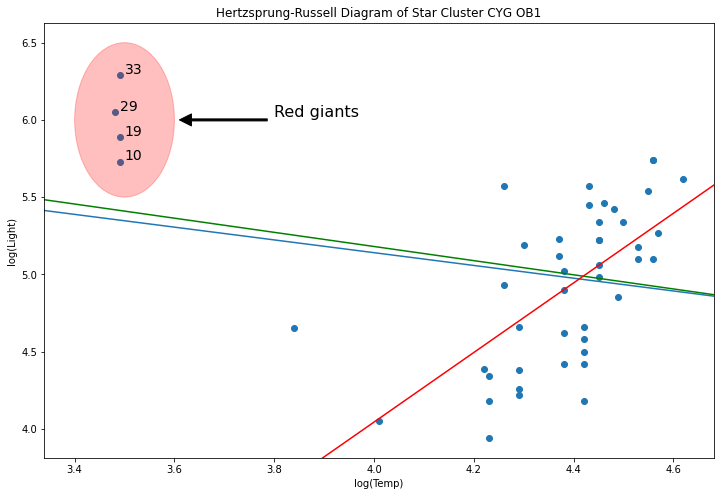

In [63]:
abline_plot(intercept=params[0], slope=params[1], ax=ax, color="red")

### Exercise: Breakdown points of M-estimator

In [64]:
np.random.seed(12345)
nobs = 200
beta_true = np.array([3, 1, 2.5, 3, -4])
X = np.random.uniform(-20, 20, size=(nobs, len(beta_true) - 1))
# stack a constant in front
X = sm.add_constant(X, prepend=True)  # np.c_[np.ones(nobs), X]
mc_iter = 500
contaminate = 0.25  # percentage of response variables to contaminate

In [65]:
all_betas = []
for i in range(mc_iter):
    y = np.dot(X, beta_true) + np.random.normal(size=200)
    random_idx = np.random.randint(0, nobs, size=int(contaminate * nobs))
    y[random_idx] = np.random.uniform(-750, 750)
    beta_hat = sm.RLM(y, X).fit().params
    all_betas.append(beta_hat)

In [66]:
all_betas = np.asarray(all_betas)
se_loss = lambda x: np.linalg.norm(x, ord=2) ** 2
se_beta = lmap(se_loss, all_betas - beta_true)

#### Squared error loss

In [67]:
np.array(se_beta).mean()

0.4450294873068656

In [68]:
all_betas.mean(0)

array([ 2.99711706,  0.99898147,  2.49909344,  2.99712918, -3.99626521])

In [69]:
beta_true

array([ 3. ,  1. ,  2.5,  3. , -4. ])

In [70]:
se_loss(all_betas.mean(0) - beta_true)

3.236091328675582e-05